In [569]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [631]:
df=sns.load_dataset("titanic")

In [637]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [639]:
 df.shape

(891, 15)

**EDA**

In [635]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

the deck column has 80% nulls values so we can drop them

In [646]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [648]:
df["age"].fillna(df['age'].mean(),inplace=True)

In [652]:
df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)

In [654]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [656]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [659]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='fare', ylabel='age'>

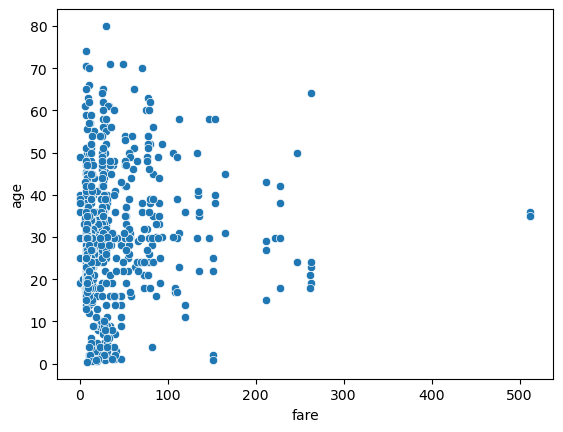

In [671]:
sns.scatterplot(data=df,x="fare",y="age")

C:\Users\wwwsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wwwsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wwwsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wwwsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

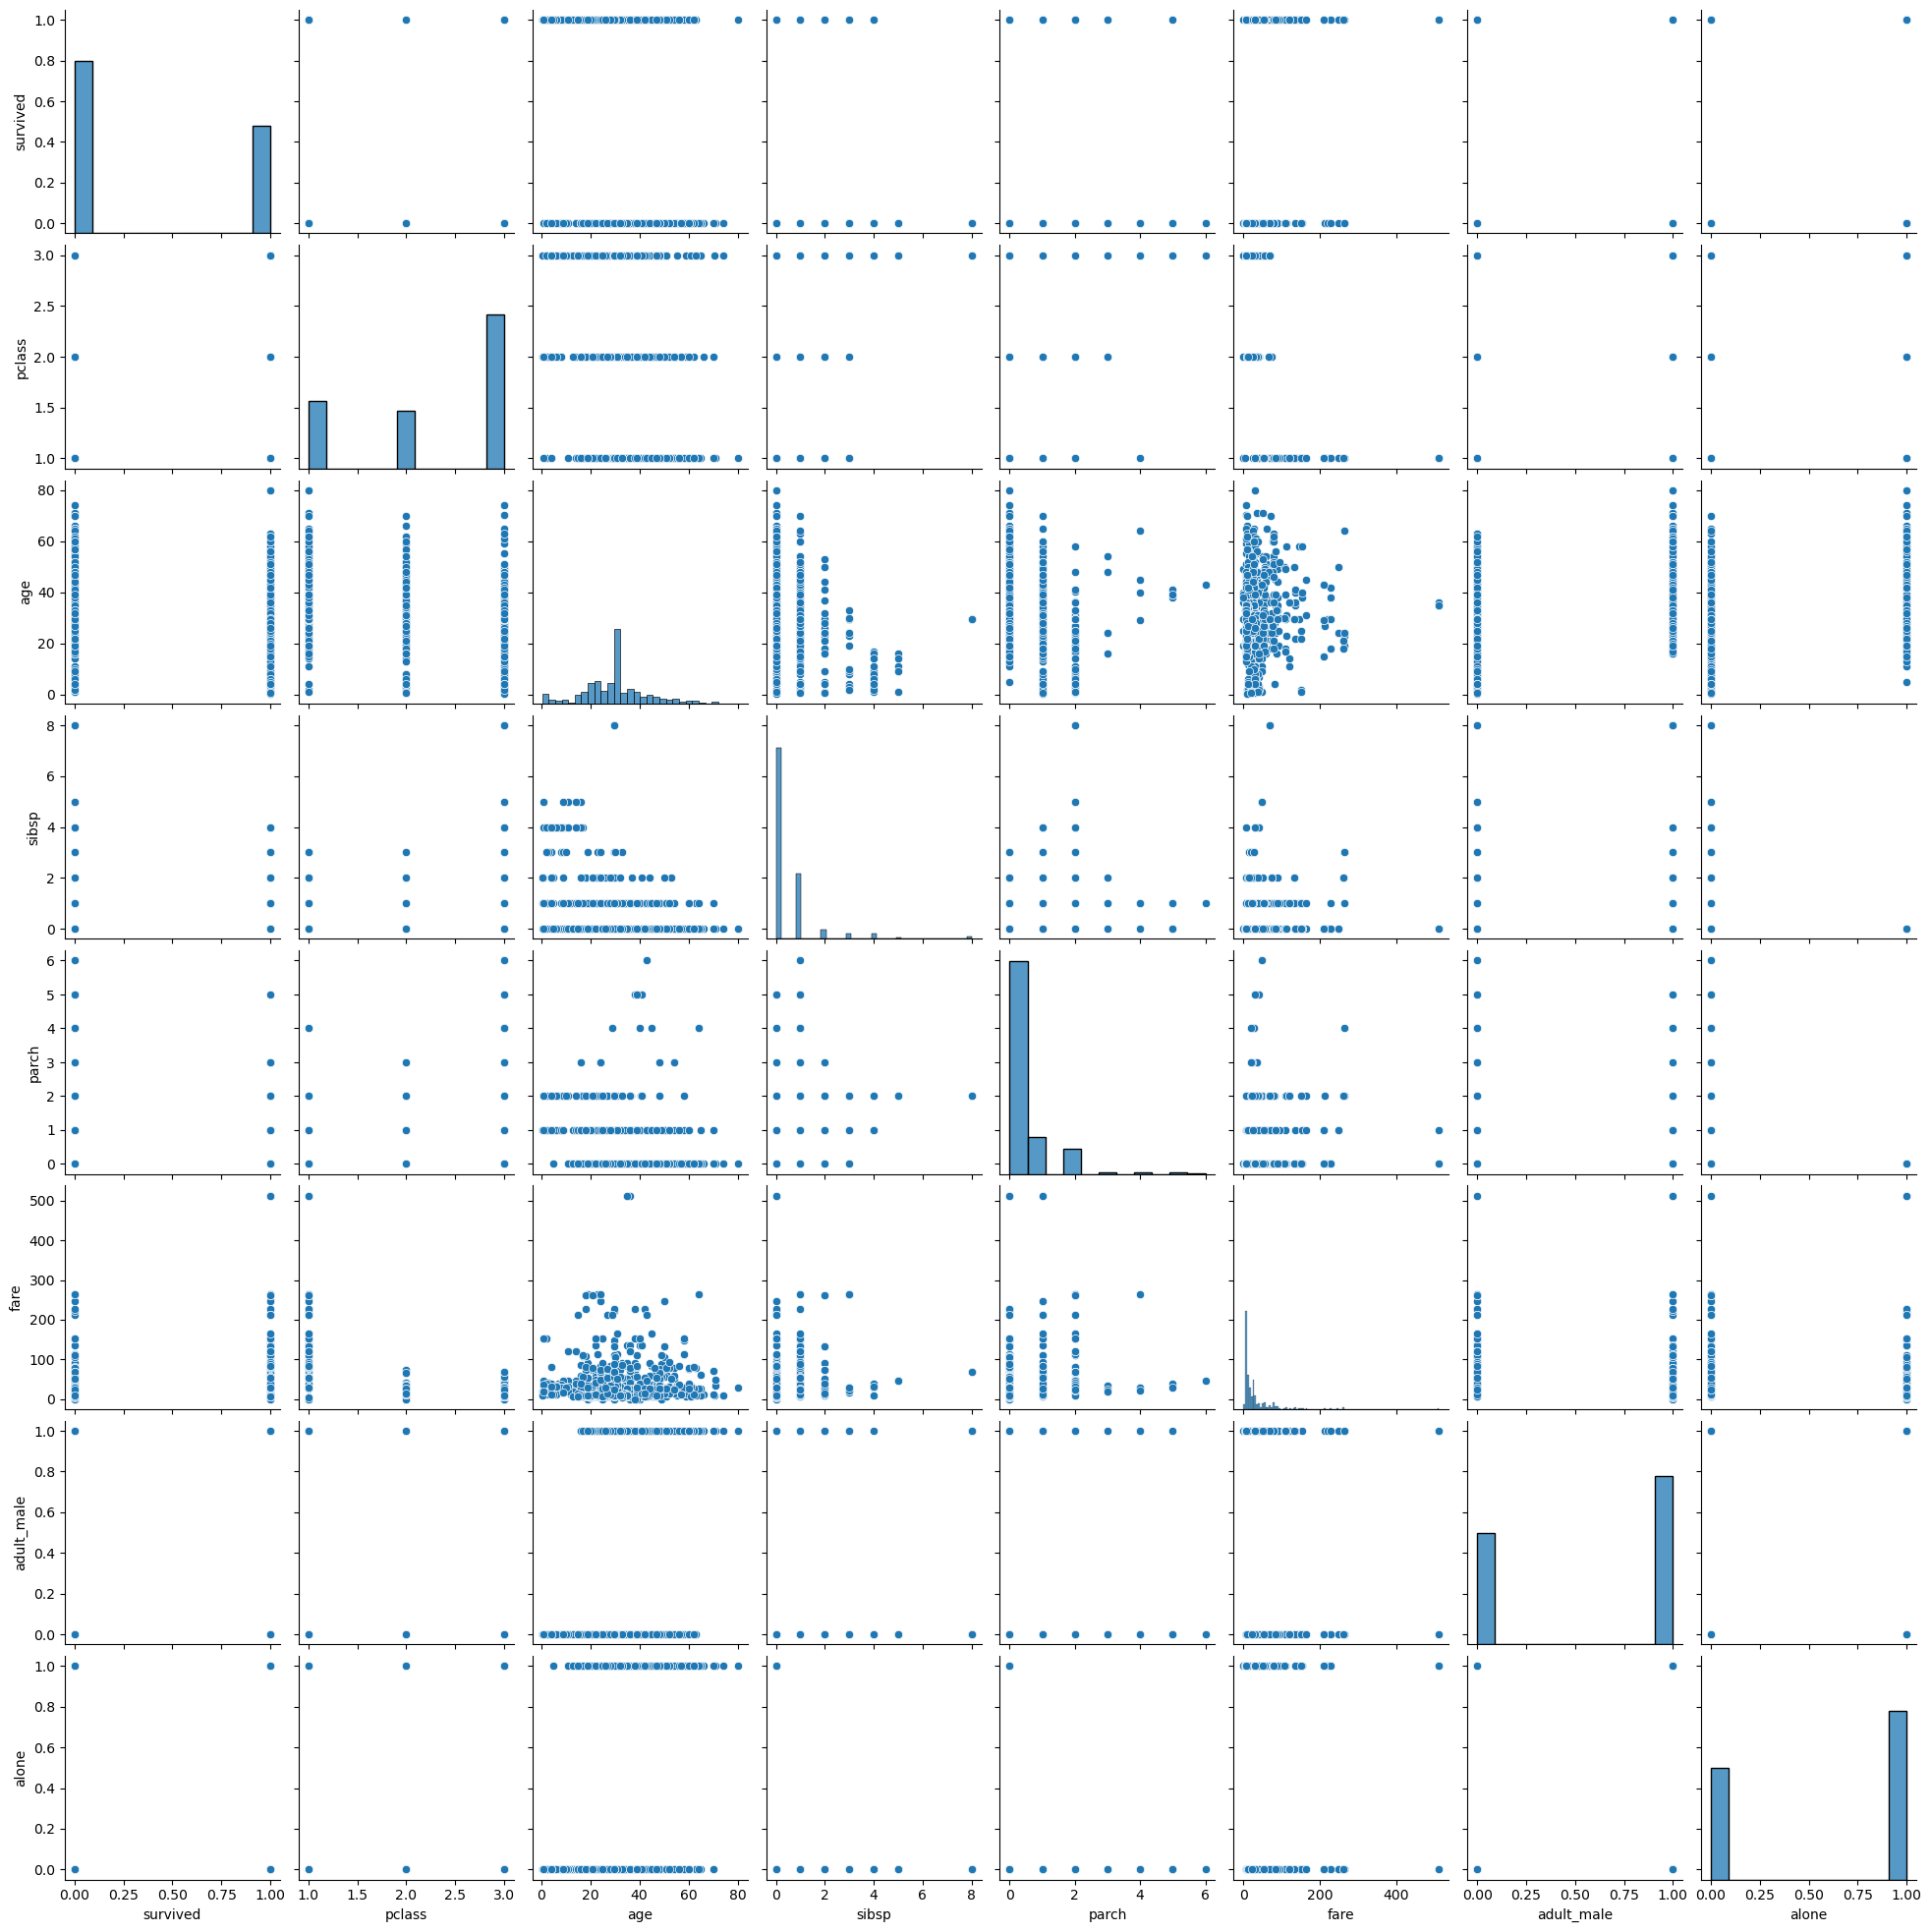

In [663]:
sns.pairplot(df)

C:\Users\wwwsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

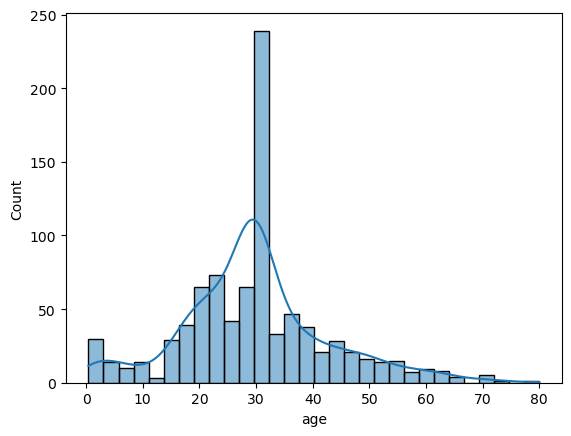

In [679]:
sns.histplot(data=df,x="age",kde=True)

C:\Users\wwwsi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Count'>

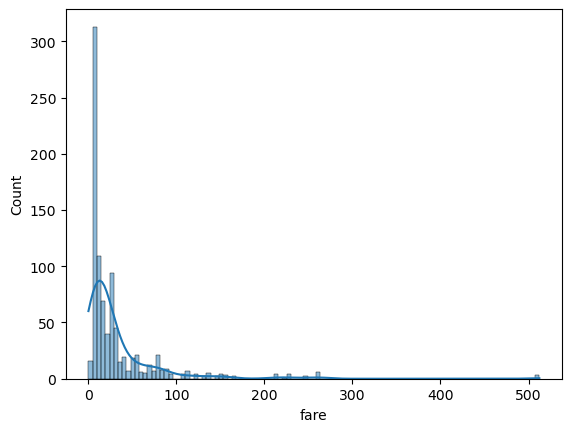

In [681]:
sns.histplot(data=df,x="fare",kde=True)

<Axes: xlabel='alive', ylabel='fare'>

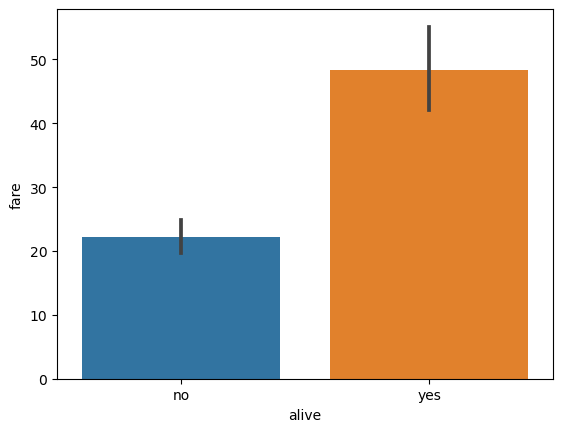

In [683]:
sns.barplot(data=df,x="alive",y="fare")

In [691]:
cr=df.corr()

ValueError: could not convert string to float: 'male'

<Axes: >

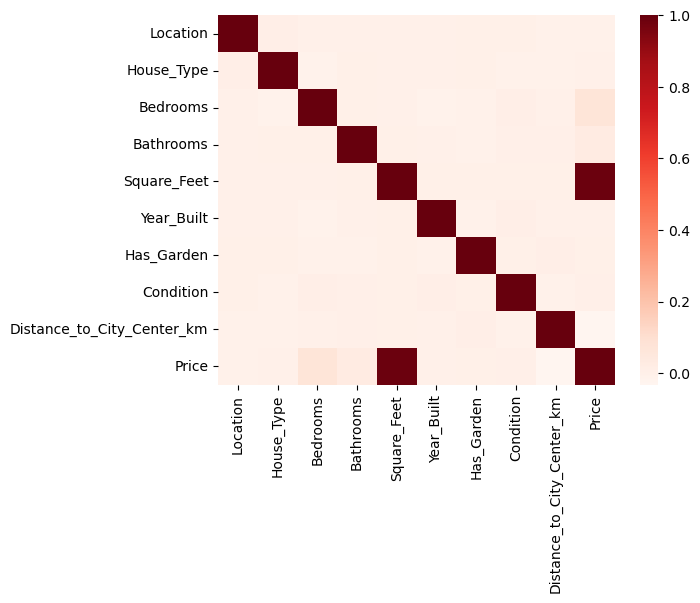

In [689]:
sns.heatmap(cr,cmap="Reds")

**We have only one highly correlated feature Square_Feet and minimal correlated column Bedrooms**

In [590]:
df.head(1)

,Location,House_Type,Bedrooms,Bathrooms,Square_Feet,Year_Built,Has_Garden,Condition,Distance_to_City_Center_km,Price
0,1,0,5,3,3415,1985,1,3,7.36,615800


Since all features are in single digits and only Square ft is in thousand's we only need to scale down the **Square_Feet** feature

In [592]:
from sklearn.preprocessing import StandardScaler,Normalizer

In [593]:
ss=StandardScaler()
nz=Normalizer()

In [594]:
ss

StandardScaler()

In [595]:
df["Square_Feet"]=ss.fit_transform(df[["Square_Feet"]])


In [596]:
df.sample(7)

,Location,House_Type,Bedrooms,Bathrooms,Square_Feet,Year_Built,Has_Garden,Condition,Distance_to_City_Center_km,Price
7939,1,2,2,3,1.547436,1998,1,3,45.88,799100
2254,2,0,4,2,-1.165517,2006,0,3,5.33,295200
9318,1,1,1,1,0.166032,2010,1,3,28.09,520000
2944,2,3,2,1,-1.039725,2016,0,3,12.28,277400
11859,3,0,5,1,0.425285,1966,0,1,9.87,621300
1530,4,0,1,3,0.404575,2008,0,1,11.07,574600
12555,4,2,3,2,-0.082483,1953,0,3,22.22,461600


**Now the data is ready for Modelling**